In [0]:
import numpy as np
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit, GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
import seaborn as sns
np.set_printoptions(suppress=True)

In [4]:
df=pd.read_csv('Kaggle_Salary.csv')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (73,77,114,146,153,171,175,212,224,228,231) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# 1.Feature selection

Feature engineering is aims for determining good features for machine learning models. It is an essential task in many projects. For example, in this project, the original data provides more than 200 features. Using all of those features would lead to heavy memory and computation costs. In additional, too many features would usually give rise to a overfitting model. Therefore, in all machine learning projects, the first step is always determine good features. This section describes the feature selection rules. Sec 1.1 describes how to use my intuition to select a potential list of features. Sec 1.2 describes how to use more powerful statistical plots further investigate some uncertain features. 

## 1.1. Feature selection using intuition

The following sub sections list the features selected at this moment and justify why they might be good features. In general, salary should be associated with the employee work responsibilities, the employee's competences, and the environment (the company or country). Therefore, features that belongs to this set are selected.

* **Q1 Age**: Older employees tend to be more experienced and thus have higher salary. But in the field of data science, olders may not be more desirable than youngers (eg. I heard some companies only seek young people as data scientists or software engineers). So this feature needs more investigation which will be described in Sec 1.2.

* **Q2 Gender**: In some jobs, males and females have different salaries but this is unknown for data science industry. So more investigation is required, which is provided in Sec 1.2.

* **Q3 Countries/regions**: developed countries/regions usually offer higher salary than developing countries/regions

* **Q4 Degree**: a better degree usually lead to a higher salary (eg. a PhD employee is likely to make more money than an undergraduate employee)

* **Q6 Company size**: large company usually offer higher salary (eg. Google employees usually have higher salary than startup employees)

* **Q9 Activities during the work**: this can be seen as job responsibilities. More responsibilities usually offer higher salary

* **Q14 Primary analysis tool**: a more advanced tool tends to lead to a higher salary

* **Q15 Coding experience**: more experienced employees tends to have higher salary

* **Q18 Programming language**: this can been seen as the number of programming languages the employees is proficient at. The higher the number, the higher the salary would be.

* **Q23 Years of using ML methods**: this can be seen as the amount of experience, the higher the number the higher the salary would be.

* **Q24 Machine learning (ML) algorithm**: this can be seen as the number of ML algorithm the employee if proficient at. Employees master more algorithm would have higher salary.

* **Q25 ML tools**: same logic as as Q18 and Q24, employees that use more tools would have higher salaries. 

* **Q26 Computer vision method**: same logic as Q18 and Q24, employees who uses more methods tend to have higher salaries.

* **Q27 NLP methods**: same logic as Q18 and Q24, employees who use more methods would have higher salaries.

## 1.2. Further investigation using statistical plot

In Sec 1.1, a list of potential features are selected, among which, the Age and Gender features need more investigation. This section describes how to use histograms to identify if they are good features. 

### 1.2.1. Histogram of gender

The histogram below illustrates the distribution of targets for male and female candidates. For convenience, the targets are mapped into numerical values using the 'target_map' defined below. The purpose of this histogram is to indicate whether gender is a good feature for classifying targets. According to the histogram, the answer is no because the target distributions for male and female are very similar. Therefore, the gender feature is excluded from our model.

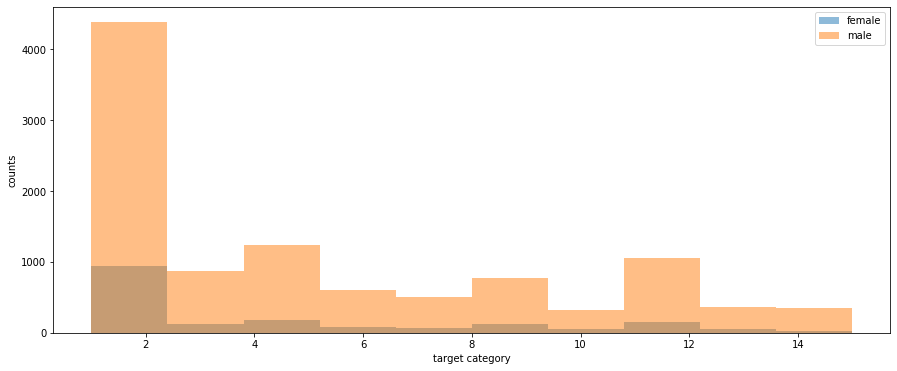

In [5]:
# define a mapping dictionary for targets
target_map={
    '0-9,999':1,
    '10,000-19,999':2,
    '20,000-29,999':3,
    '30,000-39,999':4,
    '40,000-49,999':5,
    '50,000-59,999':6,
    '60,000-69,999':7,
    '70,000-79,999':8,
    '80,000-89,999':9,
    '90,000-99,999':10,
    '100,000-124,999':11,
    '125,000-149,9991':12,
    '150,000-199,999':13,
    '200,000-249,999':14,
    '>250,000':15
}

data=df.copy()
plt.figure(figsize=(15, 6))
plt.hist(data[data['Q2']=='Female']['Q10_buckets'].map(target_map), label='female', alpha=0.5)
plt.hist(data[data['Q2']=='Male']['Q10_buckets'].map(target_map), label='male', alpha=0.5)
plt.xlabel('target category')
plt.ylabel('counts')
plt.legend()

### 1.2.2. Histogram of age

The following histogram illustrates the distribution of target categories of candidates with different ages. From the histogram, we can see that theire is no obvious distinction between those age categories. Therefore, age is not a good feature and should be excluded from the model.

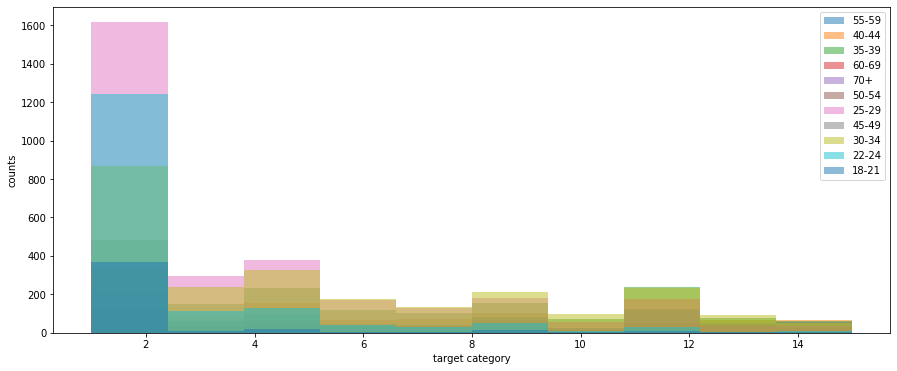

In [6]:
data=df.copy()

plt.figure(figsize=(15, 6))

for i in set(data['Q1']):
    plt.hist(data[data['Q1']==i]['Q10_buckets'].map(target_map), label=i, alpha=0.5)

plt.xlabel('target category')
plt.ylabel('counts')
plt.legend()

## 1.3 Finalized primary features

From Sec 1.2, we can exclude gender and age from the feature lists. Now we can finalize the primary features as the following:

* **Q1 Age**

* **Q2 Gender**

* **Q3 Countries/regions**

* **Q4 Degree**

* **Q6 Company size**

* **Q9 Activities during the work**

* **Q14 Primary analysis tool**

* **Q15 Coding experience**

* **Q18 Programming language**

* **Q23 Years of using ML methods**

* **Q24 Machine learning (ML) algorithm**

* **Q25 ML tools**

* **Q26 Computer vision method**

* **Q27 NLP methods**

The features listed above are primary features which are thought to be closely related with salary level. In addition there are also some secondary features which seems to have some connections with salary. However, since those features seems depend more on the company's or employer's choice rather than candidate's own abilities, they have less strong connection with salary. That's the reason why they are classified as secondary features. They won't be considered in prior, however, they will be added to the model if primary features generate an underfit model. Those secondary features are:

* **Q5 Job title**: a job that has higher requirements or qualifications may lead to a higher salary

* **Q11 ML expense**: candidates spend more money on ML may have higher salary

* **Q13 Course**: candidates take more courses may have higher salary

* **Q20 Visulization library**: candidates use more libraries may have higher salary

* **Q21 Hardware**: candidates use more hardwares may have higher salary

* **Q28 framework**: candidates use more frameworks may have higher salary

# 2.Data cleaning

In Sec 1, a list of features are selected as attributes of the model. This section describes how to preprocess the data of those features. For convenience, some encoder class and pipelines will be defined using the scikit-learn package. This will allow us to implementing preprocessing easily.

## 2.1. Q3 country

In [7]:
print('missing values in Q3: ', df['Q3'].isna().sum())
print('null values in Q3: ', (df['Q3']=='null').sum())

missing values in Q3:  0
null values in Q3:  0


From the cell output above, we can see that this feature has no missing/null values. Therefore, only encoding is required. The 'country_encoder' defined below mapped developed countries/regions to 2 and developing countries/regions to 1. In general, developed countries/regions usually offer higher salaries. Hence higher numerical values should be assigned to developed countries to reflect the positive correlation.

In [0]:
class country_encoder(BaseEstimator, TransformerMixin):

    def __init__(self):
        # define the mapping dictionary
        self.developed_region=['Australia', 'Austria', 'Canada', 'Denmark', 'France', 
                               'Germany', 'Hong Kong (S.A.R.)', 'Ireland', 'Italy', 'Japan', 
                               'Netherlands', 'New Zealand', 'Norway', 'Republic of Korea',
                               'Singapore', 'South Korea', 'Spain', 'Sweden', 'Switzerland', 
                               'Taiwan', 'United Kingdom of Great Britain and Northern Ireland',
                                'United States of America']
        
        self.func=(lambda x: 2 if (x in self.developed_region) else 1)

    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        """
            Input: the data dataframe
            Output: the same dataframe whose 'Q3' column is replace with a new 'country'
                    column with the mapped values
        """
        X_copy=X.copy()
        data=X['Q3'].copy()
        X_copy['country']=data.apply(self.func)
        X_copy=X_copy.drop(['Q3'], axis=1)
        return X_copy

## 2.2. Q4 degree

In [9]:
set(df['Q4'])

{'Bachelor’s degree',
 'Doctoral degree',
 'I prefer not to answer',
 'Master’s degree',
 'No formal education past high school',
 'Professional degree',
 'Some college/university study without earning a bachelor’s degree'}

In general, people with more advanced degrees tend to have higher salary. Therefore, more advanced degrees should be mapped to higher numerical values to reflect its positive correlation with salary. In addition, there are some people that chose not to answer this question. We map those people to the lowest value because most of them would probably have no degree but were not willing to say that. Therefore, by imputing them to the lowest value, the model will give the lowest salary increment obtained from this attribute. This imputation may cause slight underestimate on the numerical values since there might be some candidate with advanced degrees chose not to say that. However, since that's not a common case, this underestimation would be very slight.

In [0]:
class degree_encoder(BaseEstimator, TransformerMixin):

    def __init__(self):
        # define the mapping dictionary, more advanced degree gets higher numerical values
        self.map_dict={
            'Doctoral degree':7,
            'Master’s degree':6,
            'Bachelor’s degree':5,
            'Professional degree':4,
            'Some college/university study without earning a bachelor’s degree':3,
            'No formal education past high school':2,
            'I prefer not to answer':1
            }

        self.col='Q4'

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        """
            Input: the data dataframe
            Output: the same dataframe whose 'Q4' column is replace with a new 'degree'
                    column with the mapped values
        """
        X_copy=X.copy()
        data=X[self.col].copy()
        data=data.map(self.map_dict)
        X_copy['degree']=data
        X_copy=X_copy.drop([self.col], axis=1)
        return X_copy

## 2.3. Q6 company size

In [11]:
set(df['Q6'])

{'0-49 employees',
 '1000-9,999 employees',
 '250-999 employees',
 '50-249 employees',
 '> 10,000 employees'}

From the above command, no missing value is found in this feature. 

In general, larger companies usually offer higher salary and hence should be mapped to higher numerical values.

In [0]:
class company_size_encoder(BaseEstimator, TransformerMixin):
    
    def __init__(self):
        self.map_dict={
            '0-49 employees':25,
            '50-249 employees':150,
            '250-999 employees':625,
            '1000-9,999 employees':5000,
            '> 10,000 employees':20000
            }
        self.col='Q6'

    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        """
            Input: the data dataframe
            Output: the same dataframe whose 'Q6' column is replace with a new 'company_size'
                    column with the mapped values
        """
        X_copy=X.copy()
        data=X[self.col].copy()
        data=data.map(self.map_dict)
        X_copy['company_size']=data
        X_copy=X_copy.drop([self.col], axis=1)
        return X_copy

## 2.4. Q9 role, Q18 language, Q24+Q25+Q26+Q27 skill 

Those questions are all multiple choice questions each have multiple columns in dataset. A reasonable encoding method is converting those entries into 1/0 values (1: candidate checked this field, 0: candidate didn't check this field) and then sum them along rows. The resultant vector represents each candidate's proficiencies on the field that the question is asking for. 

For example, if a candidate checked Python and R in Q18 then his/her value if 2; for candadate checked Python, R and Javascript, the value is 3. This makes sense because people use more languages during works would have higher salary.

Finally, for Q24, Q25, Q26 and Q27, they can be combined to a single feature. The reason is that those questions are all related with ML techniques, so they together can represents candidate's proficiencies on ML. The more the candidate knows about ML, the higher the salary he/she would get.

The encoder below encodes those multiple question answers into numerical values using the method described above.

In [0]:
class bool_sum_encoder(BaseEstimator, TransformerMixin):
    
    def __init__(self, col_list, attr_name):
        
        # col_list: represents which columns are going to be encoded
                    # For example, for encoding Q9, the col_list is ['Q9_Part_1'.....'Q9_Part_8']. Note that 
                    # 'Q9_Part_7' is excluded because this column is 'None of the activities'.
        
        # attr_name: is the name of the encoded column
                    # For example, for Q9, the attr_name can be 'roles'

        self.col_list=col_list
        self.attr_name=attr_name

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        """
            Input: the data dataframe
            Output: the same dataframe whose columns in 'self.col_list' are replaced with a single column
                    named as 'self.attr_name'
        """
        X_copy=X.copy()
        data=X_copy[self.col_list]
        data=data.notna()+0
        X_copy[self.attr_name]=data.sum(axis=1)
        X_copy=X_copy.drop(self.col_list, axis=1)
        return X_copy

## 2.5. Q14 tool

In [14]:
set(df['Q14'])

{'Advanced statistical software (SPSS, SAS, etc.)',
 'Basic statistical software (Microsoft Excel, Google Sheets, etc.)',
 'Business intelligence software (Salesforce, Tableau, Spotfire, etc.)',
 'Cloud-based data software & APIs (AWS, GCP, Azure, etc.)',
 'Local development environments (RStudio, JupyterLab, etc.)',
 'Other',
 nan}

The encoding method for Q14 is similar to Q4. We use a map dictionary to map the tool categories into numerical values. The more advanced tool gets a higher value. For the 'Other' category and missing values, they would be caused by candidates don't use the tool at all. Therefore, they are mapped to the lowest values. This tells the model to give low salary increment obtained from this feature for this candidate. This imputation would underestimate the values for candidates who use some tools but refused to tell, which is not a common case. Therefore, this underestimation would cause little harms on prediction result.

In [0]:
class tool_encoder(BaseEstimator, TransformerMixin):

    def __init__(self):
        self.map_dict={
            'Business intelligence software (Salesforce, Tableau, Spotfire, etc.)':7,
            'Advanced statistical software (SPSS, SAS, etc.)':6,
            'Cloud-based data software & APIs (AWS, GCP, Azure, etc.)':5,
            'Local development environments (RStudio, JupyterLab, etc.)':4,
            'Basic statistical software (Microsoft Excel, Google Sheets, etc.)':3,
            'Other':1
        }

        self.col='Q14'

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        """
            Input: the data dataframe
            Output: the same dataframe whose 'Q14' column is replace with a new 'tool'
                    column with the mapped values
        """
        X_copy=X.copy()
        data=X_copy[self.col]
        data=data.map(self.map_dict)
        data=data.fillna(1)
        X_copy['tool']=data
        X_copy=X_copy.drop([self.col], axis=1)
        return X_copy

## 2.6. Q15+Q23 experience

In [16]:
set(df['Q15'])

{'1-2 years',
 '10-20 years',
 '20+ years',
 '3-5 years',
 '5-10 years',
 '< 1 years',
 'I have never written code',
 nan}

In [17]:
set(df['Q23'])

{'1-2 years',
 '10-15 years',
 '2-3 years',
 '20+ years',
 '3-4 years',
 '4-5 years',
 '5-10 years',
 '< 1 years',
 nan}

From the code output above, we can see that neither Q15 and Q23 have missing values.

We combined those 2 features together because they together make up a "years of experience" feature. The encoding procedure is the following: first map categories into numerical values using dictionaries. Then form a new feature whose value is the average of Q15 and Q23 values. Finally, for missing values in those 2 features, they are imputed with 0 since those candidates would probably have no experience but were not willing to say so. This imputation may underestimate the values of candidates who have experience but didn't respond. However, since the majority of candidates would not do that, this underestimation would lead to ignorable negative effect on predictions.

In [0]:
class exp_attr_adder(BaseEstimator, TransformerMixin):
    
    def __init__(self):
        self.coding_map_dict={
            'I have never written code':0,
            '< 1 years':0.5,
            '1-2 years':1.5,
            '3-5 years':4,
            '5-10 years':7.5,
            '10-20 years':15,
            '20+ years':30
        }

        self.ml_map_dict={
            '< 1 years':0.5,
            '1-2 years':1.5,
            '2-3 years':2.5,
            '3-4 years':3.5,
            '4-5 years':4.5,
            '5-10 years':7.5,
            '10-15 years':12.5,
            '20+ years':30
        }

    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        """
            Input: the data dataframe
            Output: the same dataframe whose 'Q15' and 'Q23' columns are replaced with a new 'experience'
                    column with the mapped values
        """
        X_copy=X.copy()
        coding_exp=X_copy['Q15']
        coding_exp=coding_exp.map(self.coding_map_dict)
        coding_exp=coding_exp.fillna(0)

        ml_exp=X_copy['Q23']
        ml_exp=ml_exp.map(self.ml_map_dict)
        ml_exp=ml_exp.fillna(0)
        X_copy['exp']=(coding_exp+ml_exp)/2
        X_copy=X_copy.drop(['Q15', 'Q23'], axis=1)
        return X_copy

## 2.7. Q10 bucket (target)

In [19]:
set(df['Q10_buckets'])

{'0-9,999',
 '10,000-19,999',
 '100,000-124,999',
 '125,000-149,9991',
 '150,000-199,999',
 '20,000-29,999',
 '200,000-249,999',
 '30,000-39,999',
 '40,000-49,999',
 '50,000-59,999',
 '60,000-69,999',
 '70,000-79,999',
 '80,000-89,999',
 '90,000-99,999',
 '>250,000'}

From the output above, we can see that there is no missing values in targets.

The encoding of targets is using the map dictionary mentioned in Sec 1.2.1. A higher salary is mapped into a higher values.

In [0]:
class salary_encoder(BaseEstimator, TransformerMixin):
    
    def __init__(self):
        self.map_dict={
            '0-9,999':1,
            '10,000-19,999':2,
            '20,000-29,999':3,
            '30,000-39,999':4,
            '40,000-49,999':5,
            '50,000-59,999':6,
            '60,000-69,999':7,
            '70,000-79,999':8,
            '80,000-89,999':9,
            '90,000-99,999':10,
            '100,000-124,999':11,
            '125,000-149,9991':12,
            '150,000-199,999':13,
            '200,000-249,999':14,
            '>250,000':15
        }

        self.col='Q10_buckets'
    
    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        """
            Input: the data dataframe
            Output: the same dataframe whose 'Q10_buckets' columns is replaced with a new 'salary'
                    column with the mapped values
        """
        X_copy=X.copy()
        data=X_copy[self.col]
        data=data.map(self.map_dict)
        X_copy['salary']=data
        X_copy=X_copy.drop([self.col], axis=1)
        return X_copy

## 2.8 Other encoders

This section describes the encoders for some secondary features defined in Sec 1.3. Those encoders will be applied if those secondary features are added into the model.

### 2.8.1 Q5 job title

The job title encoding follows the same logic described above. The jobs that seems to have higher qualifications/requirements are mapped to higher values.

In [21]:
set(df['Q5'])

{'Business Analyst',
 'DBA/Database Engineer',
 'Data Analyst',
 'Data Engineer',
 'Data Scientist',
 'Other',
 'Product/Project Manager',
 'Research Scientist',
 'Software Engineer',
 'Statistician'}

In [0]:
class title_encoder(BaseEstimator, TransformerMixin):
    
    def __init__(self):
        self.map_dict={
            'Other':1,
            'Business Analyst':2,
            'Data Analyst':3,
            'DBA/Database Engineer':4,
            'Data Engineer':4,
            'Software Engineer':5,
            'Data Scientist':6,
            'Statistician':7,
            'Product/Project Manager':8,
            'Research Scientist':9
        }

        self.col='Q5'
    
    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        """
            Input: the data dataframe
            Output: the same dataframe whose 'Q5' columns is replaced with a new 'title'
                    column with the mapped values
        """
        X_copy=X.copy()
        data=X_copy[self.col]
        data=data.map(self.map_dict)
        X_copy['title']=data
        X_copy=X_copy.drop([self.col], axis=1)
        return X_copy

### 2.8.2 Q11 ML expense

The encoding for Q11 follows the intuition "candidate spends more money on ML would have a higher salary". 

The missing values in this feature are imputed with 1. Because those missing values were caused by candidates spending no money. So we map them in the same way as the '$0 category'. This may underestimate values for some candidates who actually spent lots of money. However, since this is arare case, this underestimation would cause little harms on predictions.

In [23]:
set(df['Q11'])

{'$0 (USD)',
 '$1-$99',
 '$10,000-$99,999',
 '$100-$999',
 '$1000-$9,999',
 '> $100,000 ($USD)',
 nan}

In [0]:
class ML_expense_encoder(BaseEstimator, TransformerMixin):
    
    def __init__(self):
        self.map_dict={
            '$0 (USD)':1,
            '$1-$99':2,
            '$10,000-$99,999':3,
            '$100-$999':4,
            '$1000-$9,999':4,
            '> $100,000 ($USD)':5
        }

        self.col='Q11'
    
    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        """
            Input: the data dataframe
            Output: the same dataframe whose 'Q11' columns is replaced with a new 'ML_expense'
                    column with the mapped values
        """
        X_copy=X.copy()
        data=X_copy[self.col]
        data=data.map(self.map_dict)
        X_copy['ML_expense']=data.fillna(1)
        X_copy=X_copy.drop([self.col], axis=1)
        return X_copy

### 2.8.3 Q13 courses, Q20 visualization library, Q21 hardware, Q28 framework

Those features are multiple choice questions so they can be encoded using the bool_sum_encoder defined in Sec 2.4.

## 2.9. Defined a full pipeline to implement all the encoders above

The pipeline below is just packing all encoders above together. This allows us to implement data cleaning/encoding more conveniently in future. 

In [0]:
class clean_pipeline(BaseEstimator, TransformerMixin):

    def __init__(self, extend_feature):
        
        # extend_feature represents the features included in the model
        # extend_feature=0 tells the model only include the primary features selected in Sec 1.3
        # extend_feature=1 tells the model to include the primary features and the secondary features 'Q5 Job title'
            # and 'Q11 ML_expense'
        # extend_feature=2 tells the model to include all primary and secondary features

        self.extend_feature=extend_feature 

        self.role_attribs=['Q9_Part_1', 'Q9_Part_2', 'Q9_Part_3', 'Q9_Part_4', 'Q9_Part_5', 
                           'Q9_Part_6', 'Q9_Part_8']
        
        self.lang_attribs=['Q18_Part_1', 'Q18_Part_2', 'Q18_Part_3', 'Q18_Part_4', 'Q18_Part_5', 
                           'Q18_Part_6', 'Q18_Part_7', 'Q18_Part_8', 'Q18_Part_9', 
                           'Q18_Part_10', 'Q18_Part_12']
        
        self.skill_attribs=['Q24_Part_1', 'Q24_Part_2', 'Q24_Part_3', 'Q24_Part_4', 'Q24_Part_5', 
                                   'Q24_Part_6', 'Q24_Part_7', 'Q24_Part_8', 'Q24_Part_9', 
                                   'Q24_Part_10', 'Q24_Part_12']

        self.skill_attribs=self.skill_attribs+ ['Q24_Part_1','Q24_Part_2','Q24_Part_3','Q24_Part_4','Q24_Part_5','Q24_Part_6', 
                             'Q24_Part_7','Q24_Part_8','Q24_Part_9','Q24_Part_10','Q24_Part_12','Q25_Part_1',
                             'Q25_Part_2','Q25_Part_3','Q25_Part_4','Q25_Part_5','Q25_Part_6','Q25_Part_8',
                             'Q26_Part_1','Q26_Part_2','Q26_Part_3','Q26_Part_4','Q26_Part_5','Q26_Part_7',
                             'Q27_Part_1','Q27_Part_2','Q27_Part_3','Q27_Part_4','Q27_Part_6']
        
        self.course_attribs=['Q13_Part_1', 'Q13_Part_2', 'Q13_Part_3', 'Q13_Part_4', 'Q13_Part_5', 'Q13_Part_6',
                            'Q13_Part_7', 'Q13_Part_8', 'Q13_Part_9', 'Q13_Part_10', 'Q13_Part_12']
        
        self.plot_attribs=['Q20_Part_1', 'Q20_Part_2', 'Q20_Part_3', 'Q20_Part_4', 'Q20_Part_5', 'Q20_Part_6',
                            'Q20_Part_7', 'Q20_Part_8', 'Q20_Part_9', 'Q20_Part_10', 'Q20_Part_12']
        
        self.hardware_attribs=['Q21_Part_1', 'Q21_Part_2', 'Q21_Part_3', 'Q21_Part_5']

        self.ML_framework_attribs=['Q28_Part_1', 'Q28_Part_2', 'Q28_Part_3', 'Q28_Part_4', 'Q28_Part_5', 
                           'Q28_Part_6', 'Q28_Part_7', 'Q28_Part_8', 'Q28_Part_9', 
                           'Q28_Part_10', 'Q28_Part_12']

        if self.extend_feature==0:
            self.pipeline=ColumnTransformer(transformers=[
                ('country', country_encoder(), ['Q3']),
                ('degree', degree_encoder(), ['Q4']),
                ('company_size', company_size_encoder(), ['Q6']),
                ('role', bool_sum_encoder(self.role_attribs, 'role'), self.role_attribs),
                ('tool', tool_encoder(), ['Q14']),
                ('exp', exp_attr_adder(), ['Q15', 'Q23']),
                ('language', bool_sum_encoder(self.lang_attribs, 'language'), self.lang_attribs),
                ('skill', bool_sum_encoder(self.skill_attribs, 'skill'), self.skill_attribs),
                ('salary', salary_encoder(), ['Q10_buckets'])
            ], remainder='drop')

            self.columns=['country', 'degree', 'company_size', 'role', 'tool', 'exp', 
                        'language', 'skill', 'salary']
        
        elif self.extend_feature==1:
            self.pipeline=ColumnTransformer(transformers=[
                ('country', country_encoder(), ['Q3']),
                ('degree', degree_encoder(), ['Q4']),
                ('job_title', title_encoder(), ['Q5']),
                ('company_size', company_size_encoder(), ['Q6']),
                ('role', bool_sum_encoder(self.role_attribs, 'role'), self.role_attribs),
                ('ML_expense', ML_expense_encoder(), ['Q11']),
                ('tool', tool_encoder(), ['Q14']),
                ('exp', exp_attr_adder(), ['Q15', 'Q23']),
                ('language', bool_sum_encoder(self.lang_attribs, 'language'), self.lang_attribs),
                ('skill', bool_sum_encoder(self.skill_attribs, 'skill'), self.skill_attribs),
                ('salary', salary_encoder(), ['Q10_buckets'])
            ], remainder='drop')

            self.columns=['country', 'degree', 'job_title', 'company_size', 'role', 'ML_expense', 'tool', 'exp', 
                        'language', 'skill', 'salary']
        
        else:
            self.pipeline=ColumnTransformer(transformers=[
                ('country', country_encoder(), ['Q3']),
                ('degree', degree_encoder(), ['Q4']),
                ('job_title', title_encoder(), ['Q5']),
                ('company_size', company_size_encoder(), ['Q6']),
                ('role', bool_sum_encoder(self.role_attribs, 'role'), self.role_attribs),
                ('ML_expense', ML_expense_encoder(), ['Q11']),
                ('tool', tool_encoder(), ['Q14']),
                ('exp', exp_attr_adder(), ['Q15', 'Q23']),
                ('language', bool_sum_encoder(self.lang_attribs, 'language'), self.lang_attribs),
                ('skill', bool_sum_encoder(self.skill_attribs, 'skill'), self.skill_attribs),
                ('course', bool_sum_encoder(self.course_attribs, 'course'), self.course_attribs),
                ('plot', bool_sum_encoder(self.plot_attribs, 'plot'), self.plot_attribs),
                ('hardware', bool_sum_encoder(self.hardware_attribs, 'hardware'), self.hardware_attribs),
                ('ML_framework', bool_sum_encoder(self.ML_framework_attribs, 'ML_framework'), self.ML_framework_attribs),
                ('salary', salary_encoder(), ['Q10_buckets'])
            ], remainder='drop')

            self.columns=['country', 'degree', 'job_title', 'company_size', 'role', 'ML_expense', 'tool', 'exp', 
                        'language', 'skill', 'course', 'plot', 'hardware', 'ML_framework', 'salary']

    def fit(self, X, y=None):
        X_copy=X.copy()
        self.pipeline.fit(X_copy)
        return self
    
    def transform(self, X, y=None):
        X_copy=X.copy()
        X_copy=self.pipeline.transform(X_copy)
        X_copy=pd.DataFrame(X_copy, columns=self.columns)
        return X_copy

## 2.10. Standardize company_size and define a full-pipeline

The last thing we need to do is standardize the company_size to make this feature's average equal 0 and standard deviation equal 1. The reason is that, from the df_prep.head() above, we can see that the scale of company_size is much higher than other features. This would lead to a long and narrow contour which can slows down training.

The pipeline defined below applies clean_pipeline defined in Sec 2.8 and then standardize the company_size feature.

In [0]:
class prep_pipeline(BaseEstimator, TransformerMixin):

    def __init__(self, extend_feature):
        self.extend_feature=extend_feature
    
    def fit(self, X, y=None):
        X_copy=X.copy()
        X_copy=clean_pipeline(self.extend_feature).fit_transform(X_copy)
        self.sta_fit_data=X_copy['company_size'].values.reshape((-1, 1))
        self.standardizer=StandardScaler().fit(self.sta_fit_data)
        return self

    def transform(self, X, y=None):
        """
            Input: the data dataframe
            Output: the same dataframe whose 'company_size' columns is replaced with a new 'company_size_sta'
                    column with the mapped values
        """
        X_copy=X.copy()
        X_copy=clean_pipeline(self.extend_feature).fit_transform(X_copy)
        data=X_copy['company_size'].values.reshape((-1, 1))
        X_copy['company_size_sta']=self.standardizer.transform(data)
        X_copy=X_copy.drop(['company_size'], axis=1)
        return X_copy

Here is a demo of the encoded data  frame using this full-pipeline

In [27]:
df_prep=prep_pipeline(0).fit_transform(df)
df_prep.head()

,country,degree,role,tool,exp,language,skill,salary,company_size_sta
0,2.0,6.0,0.0,3.0,1.50,6.0,4.0,4.0,-0.072567
1,1.0,4.0,4.0,5.0,0.00,0.0,0.0,1.0,1.806743
2,2.0,6.0,0.0,4.0,2.00,4.0,11.0,15.0,1.806743
3,1.0,5.0,0.0,4.0,0.50,2.0,12.0,1.0,-0.695872
4,2.0,6.0,2.0,6.0,21.25,2.0,33.0,7.0,-0.695872


# 3.Exploratory data analysis

This section describe the exploratory data analysis using visualization libraries, which is actually done before the feture selection and data cleaning. Those figures can help us understand the data and decide how to properly preprocessing the data. 

## 3.1. Histogram of targets

The following histogram illustrates the distribution of data targets. For convenience, the targets are mapped using the "target_map" mentioned before. From the histogram, we can see that the target distribution is heavily heterogenous and tailed. Therefore, when splitting the data into train and test sets, the stratified sampling is applied instead of random sampling.

Text(0.5, 1.0, 'Target Distribution')

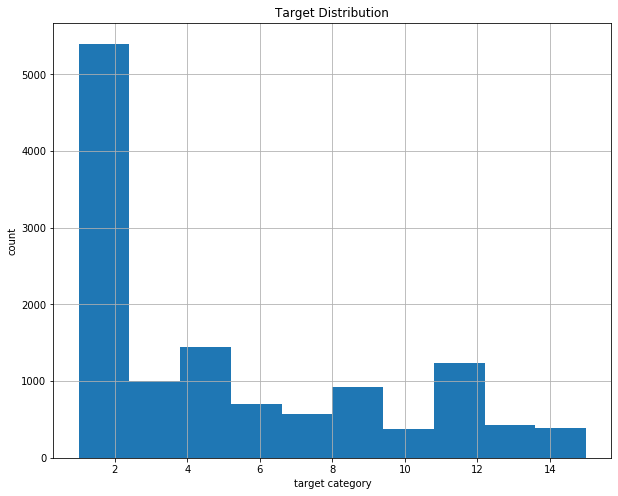

In [28]:
# define a mapping dictionary for targets
target_map={
    '0-9,999':1,
    '10,000-19,999':2,
    '20,000-29,999':3,
    '30,000-39,999':4,
    '40,000-49,999':5,
    '50,000-59,999':6,
    '60,000-69,999':7,
    '70,000-79,999':8,
    '80,000-89,999':9,
    '90,000-99,999':10,
    '100,000-124,999':11,
    '125,000-149,9991':12,
    '150,000-199,999':13,
    '200,000-249,999':14,
    '>250,000':15
}

plt.figure(figsize=(10, 8))
df['Q10_buckets'].copy().map(target_map).hist()
plt.xlabel('target category')
plt.ylabel('count')
plt.title('Target Distribution')

## 3.2. Histograms of target category with different job titles

The following histogram illustartes the distribution of target category for each job titles. This can expllain why job title is not a primary feature. From the histograms, we can see that the distributions for those jobs are largely overlapped.

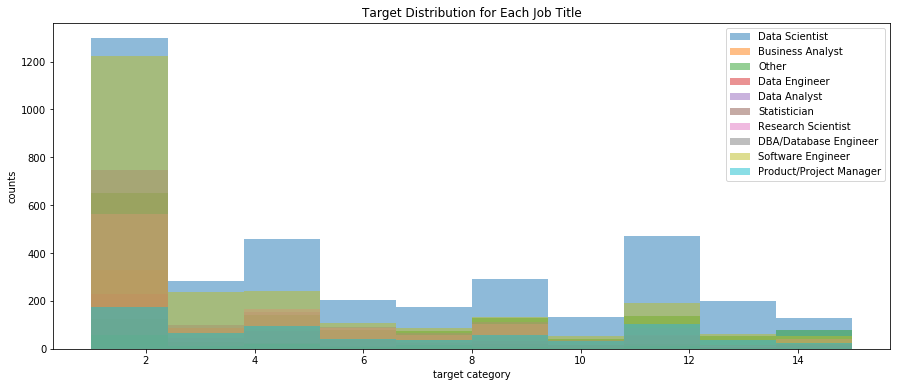

In [29]:
data=df.copy()

plt.figure(figsize=(15, 6))

for i in set(data['Q5']):
    plt.hist(data[data['Q5']==i]['Q10_buckets'].map(target_map), label=i, alpha=0.5)

plt.xlabel('target category')
plt.ylabel('counts')
plt.title('Target Distribution for Each Job Title')
plt.legend()

## 3.3. Pie chart of data analysis tools

The Pie chart below shows the ratio of each data analysis tool answered in Q14. We can see that the missing value is 8.4% of the total data, which is a quite large amount. Therefore, we cannot drop those rows when encoding data.

In [0]:
category=list(df.copy()['Q14'].value_counts(dropna=False).index)
count=df.copy()['Q14'].value_counts(dropna=False).values

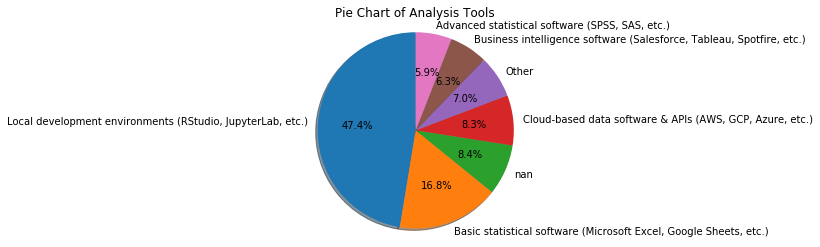

In [31]:
fig1, ax1 = plt.subplots()
ax1.pie(count, labels=category, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Pie Chart of Analysis Tools')
plt.show()

## 3.4. looking for correlations

Using the method described in Sec 1.2 and 1.3 and some intuition (the details regarding this intuition are described in Sec 2), some features are selected to construct the model. The following codes calculate their correlations with targets and rank the feature improtance based on the correlations.

From the ranking, we can see that the country and exp are the two most correlated features.

In [32]:
corr_matrix=df_prep.corr()
corr=corr_matrix['salary'].sort_values(ascending=False)
corr

salary              1.000000
country             0.578048
exp                 0.399357
role                0.265673
company_size_sta    0.161928
degree              0.140383
skill               0.118312
language            0.116465
tool                0.099735
Name: salary, dtype: float64

We can also visualize the correlation.

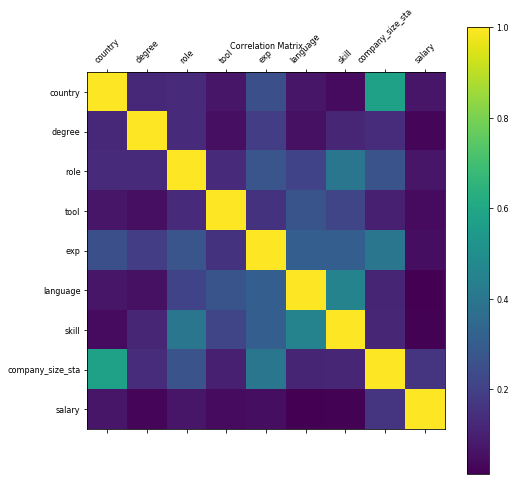

In [33]:
df_plot=df_prep[['country','degree','role','tool','exp','language','skill','company_size_sta','salary']]
f = plt.figure(figsize=(8, 8))
plt.matshow(df_prep.corr(), fignum=f.number)
plt.xticks(range(df_plot.shape[1]), df_plot.columns, fontsize=8, rotation=45)
plt.yticks(range(df_plot.shape[1]), df_plot.columns, fontsize=8)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=8)
plt.title('Correlation Matrix', fontsize=8);

# 4.Model implementation

## 4.1. Split train & test data

As described in 3.1, the stratified sampling is applied to generate training and test data set.

In [0]:
split=StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_index, test_index in split.split(df, df['Q10_buckets']):
    train_set=df.copy().iloc[train_index]
    test_set=df.copy().iloc[test_index]

Precprocessing the train and test data set using the full-pipeline defined in Sec 2.9

In [0]:
preprocessor1=prep_pipeline(0)
preprocessor1.fit(train_set)
df_train1=preprocessor1.transform(train_set)
df_test1=preprocessor1.transform(test_set)

Define a class for ordinary classifier

In [0]:
class ordinary_clf():

    def __init__(self, C=1, solver='lbfgs'):
        self.C=C
        self.solver=solver
        self.models=[]

    def train(self, X, y):
        for i in list(range(16))[1:]:
            if i != 15:
                y_binary=np.copy(y)
                y_binary=(y_binary>i)+0
                model=LogisticRegression(C=self.C, solver=self.solver, max_iter=1000)
                model.fit(X, y_binary)
                self.models.append(model)

            if i==15:
                y_binary=np.copy(y)
                y_binary=(y==15)+0
                model=LogisticRegression(C=self.C, solver=self.solver, max_iter=1000)
                model.fit(X, y_binary)
                self.models.append(model)
        return self

    def predict_proba(self, X): # calculate the probabilities for X belonging to each class
        last_prob=0
        prob=[]

        for i in list(range(16))[1:]:
            model=self.models[i-1]
            if i != 15:
                prob_binary=model.predict_proba(X)[:,0]-last_prob
                last_prob=model.predict_proba(X)[:,0]
                prob.append(prob_binary)
            
            if i==15:
                prob_binary=model.predict_proba(X)[:,1]
                prob.append(prob_binary)
        
        return np.array(prob).T

    def predict(self, X): # return the class of X with the largest probability
        prob=self.predict_proba(X)
        predict=prob.argmax(axis=1)+1
        return predict

Define a cross-validation function

In [0]:
def cross_validation(model, X, y, print_acc=True):
    kfold = KFold(n_splits=10)
    kfold.get_n_splits(X)

    train_accuracy = np.zeros(10)
    val_accuracy = np.zeros(10)
    np_idx = 0

    for train_idx, test_idx in kfold.split(X):
        X_train, X_test = X[train_idx], X[test_idx]
        y_train, y_test = y[train_idx], y[test_idx]
        
        model.train(X_train, y_train)
        train_predictions = model.predict(X_train)
        val_predictions = model.predict(X_test)
        
        train_ACC = accuracy_score(y_train, train_predictions)
        val_ACC = accuracy_score(y_test, val_predictions)
        
        train_accuracy[np_idx] = train_ACC*100
        val_accuracy[np_idx] = val_ACC*100
        np_idx += 1
        
        if print_acc:
            print ("Fold {}: train accuracy: {}%, val accuracy: {}%".format(np_idx, round(train_ACC*100,3), round(val_ACC*100,3)))   

    if print_acc:
        print ("Average train accuracy: {}%({}%)".format(round(np.mean(train_accuracy),3),round(np.var(train_accuracy),3)))
        print ("Average val accuracy: {}%({}%)".format(round(np.mean(val_accuracy),3),round(np.var(val_accuracy),3)))
    return train_accuracy, val_accuracy

## 4.2. Implement logistic regression and cross-validation

In [0]:
X_train1=df_train1.values[:, [0,1,2,3,4,5,6,8]]
y_train1=df_train1.values[:, 7]

In [39]:
model=ordinary_clf()
acc1=cross_validation(model, X_train1, y_train1)

Fold 1: train accuracy: 34.767%, val accuracy: 32.9%
Fold 2: train accuracy: 34.356%, val accuracy: 36.6%
Fold 3: train accuracy: 34.545%, val accuracy: 34.9%
Fold 4: train accuracy: 34.689%, val accuracy: 33.6%
Fold 5: train accuracy: 34.645%, val accuracy: 34.0%
Fold 6: train accuracy: 34.656%, val accuracy: 33.9%
Fold 7: train accuracy: 34.478%, val accuracy: 35.5%
Fold 8: train accuracy: 34.563%, val accuracy: 34.735%
Fold 9: train accuracy: 34.563%, val accuracy: 34.735%
Fold 10: train accuracy: 34.541%, val accuracy: 34.935%
Average train accuracy: 34.58%(0.012%)
Average val accuracy: 34.58%(0.978%)


From the validation accuracy, we can see that training and validation are very close and both of them are low, which is a characteristic of underfitting. To solve this problem, the following tricks can be applied:

* Increase the number of features
* Reduce the power of regularization
* Change the type of solver

The 2nd and 3rd tricks will be investigated in Sec 5 using grid search. Now, we focus on adding new features to our model to see if it can improve the performance.

## 4.3 Test the 2nd model

In this section, we define a more complex model which contains more features, and see if this can improve the model accuracy.

In [0]:
preprocessor2=prep_pipeline(1) # set the extend_feature=1 for the pipeline defined in Sec 2.9
preprocessor2.fit(train_set)

df_train2=preprocessor2.transform(train_set)
df_test2=preprocessor2.transform(test_set)

In [0]:
X_train2=df_train2.values[:, [0,1,2,3,4,5,6,7,8,10]]
y_train2=df_train2.values[:, 9]

In [42]:
model=ordinary_clf()
acc2=cross_validation(model, X_train2, y_train2)

Fold 1: train accuracy: 34.767%, val accuracy: 32.2%
Fold 2: train accuracy: 34.356%, val accuracy: 35.9%
Fold 3: train accuracy: 34.345%, val accuracy: 36.0%
Fold 4: train accuracy: 34.634%, val accuracy: 33.4%
Fold 5: train accuracy: 34.489%, val accuracy: 34.7%
Fold 6: train accuracy: 34.623%, val accuracy: 33.5%
Fold 7: train accuracy: 34.434%, val accuracy: 35.2%
Fold 8: train accuracy: 34.441%, val accuracy: 35.135%
Fold 9: train accuracy: 34.563%, val accuracy: 34.034%
Fold 10: train accuracy: 34.452%, val accuracy: 35.035%
Average train accuracy: 34.51%(0.016%)
Average val accuracy: 34.51%(1.315%)


According to the validation result, this model does not improve the accuracy. 

## 4.4 Test the 3rd model

We now add all primary and secondary features to the model and test if it can improve the accuracy.

In [0]:
preprocessor3=prep_pipeline(2)
preprocessor3.fit(train_set)

df_train3=preprocessor3.transform(train_set)
df_test3=preprocessor3.transform(test_set)

In [0]:
X_train3=df_train3.values[:, [0,1,2,3,4,5,6,7,8,10,11,12,14]]
y_train3=df_train3.values[:, 13]

In [45]:
model=ordinary_clf()
acc3=cross_validation(model, X_train3, y_train3)

Fold 1: train accuracy: 35.001%, val accuracy: 32.3%
Fold 2: train accuracy: 34.578%, val accuracy: 36.1%
Fold 3: train accuracy: 34.556%, val accuracy: 36.3%
Fold 4: train accuracy: 34.845%, val accuracy: 33.7%
Fold 5: train accuracy: 34.745%, val accuracy: 34.6%
Fold 6: train accuracy: 34.8%, val accuracy: 34.1%
Fold 7: train accuracy: 34.623%, val accuracy: 35.7%
Fold 8: train accuracy: 34.685%, val accuracy: 35.135%
Fold 9: train accuracy: 34.797%, val accuracy: 34.134%
Fold 10: train accuracy: 34.674%, val accuracy: 35.235%
Average train accuracy: 34.73%(0.017%)
Average val accuracy: 34.73%(1.344%)


Still, the accuracy isn't improved too much

## 4.5 Comparing those 3 models

The following dataframe summarizes the accuracies of the three models

In [46]:
Accuracy={'Classifier1': [acc1[1].mean(), acc1[1].var()],
          'Classifier2': [acc2[1].mean(), acc2[1].var()],
          'Classifier3': [acc3[1].mean(), acc3[1].var()]}

accuracy_comp=pd.DataFrame(Accuracy, index=['val acc mean', 'val acc var'])
accuracy_comp

,Classifier1,Classifier2,Classifier3
val acc mean,34.580440,34.51042,34.730450
val acc var,0.978466,1.31457,1.343675


We can see that those three model have very close performance. Therefore, for maintenance convenience, we continue the tuning and testing processes with the most simple mode --- the 1st model (with fewest number of features). 

# 5.Model tuning

In thise section, we tune the hyperparameter regularization power and solver of the selected model from Sec 4.5 using grid search.

In [0]:
def grid_search(X, y, C_list, solver_list):

    best_model = 'none'
    best_params = {}
    best_accuracy = 0
    best_std = 0

    for C in C_list:
        for solver in solver_list:
            
            model = ordinary_clf(C, solver)
            train_accuracy, val_accuracy=cross_validation(model, X, y, print_acc=False)
            
            if np.mean(val_accuracy) > best_accuracy:
                best_model = model
                best_params = {'C':C, 'solver':solver}
                best_accuracy = np.mean(val_accuracy)
                best_std = np.std(val_accuracy)

    print (best_params)
    print ("Best Score: {}%({}%)".format(round(best_accuracy,3),round(best_std,3)))      

    print ("\nThe optimal log model uses C={}, and a {} solver, and has a cross validation score of {}% with a standard deviation of {}%".format(best_params['C'],best_params['solver'],round(best_accuracy,3),round(best_std,3)))

    return best_params, best_model

In [0]:
C_list=[0.01,0.05,0.1,0.5,1,5,10] # the best C is 1
solver_list=['newton-cg','lbfgs','liblinear','sag'] # the best solver is 'newton-cg'

#  best_params, best_model=grid_search(X_train1, y_train1, C_list, solver_list)

According to the grid search result, the best model has C=1 and solver='newton-cg'

# 6.Testing & Discussion

With the result of grid search, we can finalize our model by setting C=1 and solver='newton-cg'.

We now test this model on the test set to see its generalization performance.

## 6.1. Measure train and test sets accuracies

Print out the train and test accuracy, we can see they very low and close to each other, which is an indication of underfitting.

In [0]:
preprocessor1=prep_pipeline(0)
preprocessor1.fit(train_set)
df_train1=preprocessor1.transform(train_set)
df_test1=preprocessor1.transform(test_set)

In [0]:
X_train1=df_train1.values[:, [0,1,2,3,4,5,6,8]]
y_train1=df_train1.values[:, 7]
X_test1=df_test1.values[:, [0,1,2,3,4,5,6,8]]
y_test1=df_test1.values[:, 7]

In [0]:
model=ordinary_clf(1, 'newton-cg').train(X_train1, y_train1)
y_train_hat=model.predict(X_train1)
y_test_hat=model.predict(X_test1)

In [52]:
print('Train accuracy:', accuracy_score(y_train1, y_train_hat))
print('Test accuracy:', accuracy_score(y_test1, y_test_hat))

Train accuracy: 0.3460038011403421
Test accuracy: 0.35


## 6.2. Plot groundtruth and prediction distributions

The following 2 plots illustrates the test prediction and groundtruth distributions. We can see that the model does poorly on test set because those 2 distributions do not match well.

From the plot, the main reason that the model does bad is that:

* The groundtruth distribution is moderately tailed on Class 1 and 2. Other categories are almost uniform distributed.

* The predictions are dominated by Class 1, 11 and 13. Other classes are rarely predicted

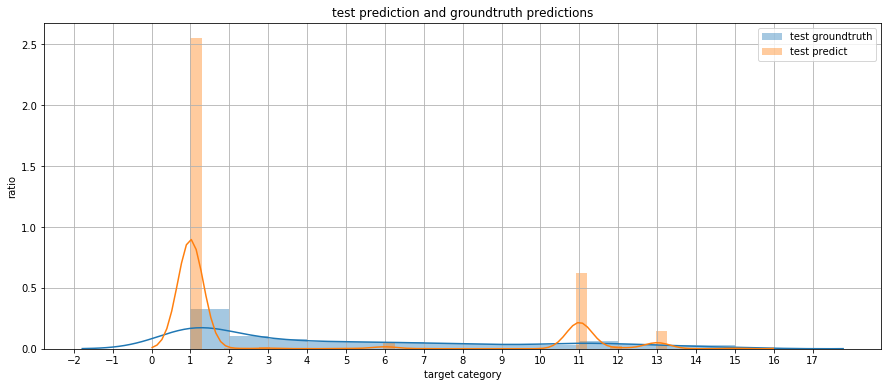

In [53]:
plt.figure(figsize=(15,6))
sns.distplot(y_test1, hist=True, label='test groundtruth')
sns.distplot(y_test_hat, hist=True, label='test predict')
plt.legend()
plt.xlabel('target category')
plt.xticks(np.arange(-2, 18, 1))
plt.ylabel('ratio')
plt.title('test prediction and groundtruth predictions')
plt.grid(which='both')

This can also be reflected by the confusion matrix. We can see that the model outputs are dominated by Class 1, 11 and 13.

In [54]:
target_class=list(range(16))[1:]
conf_matrix=confusion_matrix(y_test1, y_test_hat)
conf_matrix=pd.DataFrame(conf_matrix, index=target_class, columns=target_class)
conf_matrix.index.name='Groundtruth'
conf_matrix.columns.name='Prediction'
conf_matrix

Prediction,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
Groundtruth,,,,,,,,,,,,,,,
1,770,2,0,0,0,2,0,0,0,0,24,2,7,0,1
2,263,0,1,1,0,1,0,0,0,0,5,0,1,0,0
3,184,0,1,1,1,3,1,0,0,0,10,0,1,0,0
4,108,3,4,0,1,1,0,0,0,0,24,2,3,0,0
5,114,0,1,0,1,3,0,0,0,0,22,1,2,0,0
6,93,0,0,0,1,4,0,0,0,0,38,0,5,0,0
7,69,1,2,0,0,7,0,0,0,0,34,0,2,0,0
8,57,0,0,0,0,2,0,0,0,0,39,0,7,0,0
9,32,0,0,0,0,3,0,0,0,0,40,0,6,0,0


In [55]:
print('prediction results')
conf_matrix.sum(axis=0)

prediction results


Prediction
1     1860
2        7
3       11
4        2
5        6
6       34
7        2
8        0
9        0
10       0
11     451
12      15
13     104
14       0
15       8
dtype: int64

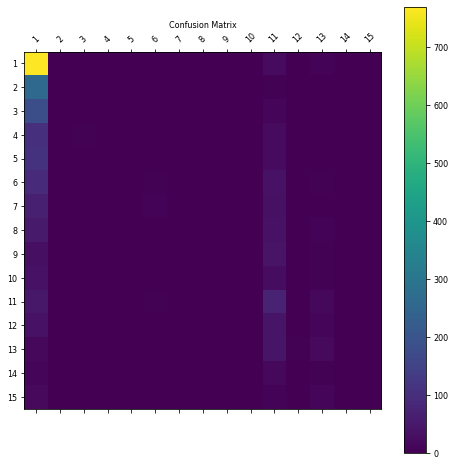

In [56]:
f = plt.figure(figsize=(8, 8))
plt.matshow(conf_matrix, fignum=f.number)
plt.xticks(range(conf_matrix.shape[1]), conf_matrix.columns, fontsize=8, rotation=45)
plt.yticks(range(conf_matrix.shape[1]), conf_matrix.columns, fontsize=8)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=8)
plt.title('Confusion Matrix', fontsize=8);

We can also plot the probability of a test sample belonging to each bucket.

In [61]:
# idx=np.random.randint(0, y_test1.shape[0]) # disable the random function since it generates different values each time
idx=1446
prob=model.predict_proba(X_test1)[idx]
print('probability of test sample %d belongs to each target bucket' % (idx))
pd.Series(prob, index=list(range(16))[1:])

probability of test sample 1446 belongs to each target bucket


1     0.293633
2     0.229433
3     0.155392
4     0.083061
5     0.068437
6     0.047064
7     0.027006
8     0.021474
9     0.020015
10    0.012154
11    0.020827
12    0.007116
13    0.001228
14    0.003224
15    0.009935
dtype: float64

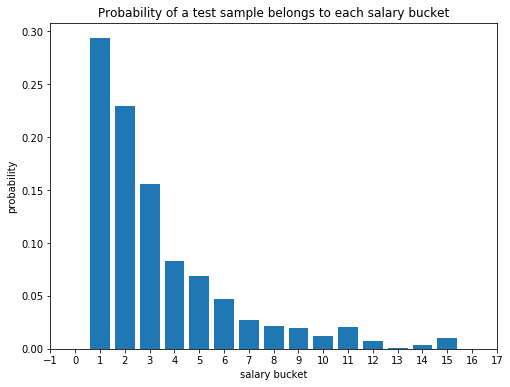

In [74]:
plt.figure(figsize=(8,6))
plt.bar(x=list(range(16))[1:], height=prob)
plt.xticks(np.arange(-1, 18, 1))
plt.title('Probability of a test sample belongs to each salary bucket')
plt.xlabel('salary bucket')
plt.ylabel('probability')
plt.show()

We can see that the model actually has no strong evidence to categorize this sample to any bucket for sure. However, based on the "largest probability" rule, the sample is finally be categorized to salary class 1, which in fact it is Class 2.

This would be the reason why the model predicts so many Class 1 according to the confusion matrix. The model can only get rought where the sample should be settled (low class, middle class, high class), but can not find the exact Class.

## 6.3 Further discussion

We can see that the train and test accuracy are very close and low. Therefore, this model is underfitting.

To increase the accuracy, we can feed more data to the model,add more high correlation features or use a more complex model such as neural network.